In [1]:
import lightgbm
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
df_eye_all = pd.read_csv("VREED_Dataset/04 Eye Tracking Data/02 Eye Tracking Data (Features Extracted)/EyeTracking_FeaturesExtracted.csv")
df_gsr_all = pd.read_csv("VREED_Dataset/05 ECG-GSR Data/02 ECG-GSR (Features Extracted)/GSR_FeaturesExtracted.csv")
df_ecg_all = pd.read_csv("VREED_Dataset/05 ECG-GSR Data/02 ECG-GSR (Features Extracted)/ECG_FeaturesExtracted.csv")

In [3]:
#Fill empty cells with mean of their respective column values
mean_Mean_Blink_Duration = df_eye_all["Mean_Blink_Duration"].mean()
df_eye_all["Mean_Blink_Duration"].fillna(mean_Mean_Blink_Duration, inplace = True)

mean_SD_Blink_Duration = df_eye_all["SD_Blink_Duration"].mean()
df_eye_all["SD_Blink_Duration"].fillna(mean_SD_Blink_Duration, inplace = True)

mean_Skew_Blink_Duration = df_eye_all["Skew_Blink_Duration"].mean()
df_eye_all["Skew_Blink_Duration"].fillna(mean_Skew_Blink_Duration, inplace = True)

mean_Max_Blink_Duration = df_eye_all["Max_Blink_Duration"].mean()
df_eye_all["Max_Blink_Duration"].fillna(mean_Max_Blink_Duration, inplace = True)

#Rename GSR file's Mean
df_gsr_all.rename(columns={'Mean':'Mean_GSR'}, inplace=True)

In [4]:
df_ecg_all = df_ecg_all.drop(['Quad_Cat'], axis=1)
df_eye_all = df_eye_all.drop(['Quad_Cat'], axis=1)

df_all = pd.concat([df_gsr_all,df_ecg_all,df_eye_all], axis = 1)
df_all

,Quad_Cat,Mean_GSR,SD,Variance,Minimum,Maximum,Number of Peaks,Number of Valleys,Ratio,Mean,...,Skew_Microsac_Dir,Max_Microsac_Dir,Mean_Microsac_H_Amp,SD_Microsac_H_Amp,Skew_Microsac_H_Amp,Max_Microsac_H_Amp,Mean_Microsac_V_Amp,SD_Microsac_V_Amp,Skew_Microsac_V_Amp,Max_Microsac_V_Amp
0,1,3.560146,0.139966,0.019591,3.317403,3.982484,0.000019,0.000019,5.300000e-11,9.404760e-07,...,-0.047816,179.719495,0.419874,25.214209,3.156580,220.069746,-0.182289,8.975206,0.107803,45.070474
1,0,5.567496,0.659287,0.434660,4.043869,7.146960,0.000036,0.000036,1.880000e-10,4.330640e-07,...,-0.161061,179.563907,-4.596920,74.737290,-8.745373,144.173941,0.660248,10.523471,3.971437,81.150671
2,0,4.072888,0.530539,0.281472,2.393337,4.711197,0.000041,0.000041,2.820000e-10,9.034100e-06,...,-0.214484,179.789091,-1.217540,17.351371,-2.922202,35.323715,-1.158868,14.659309,-5.198588,26.595861
3,3,5.407625,0.891521,0.794809,3.213556,7.700064,0.000041,0.000041,1.910000e-10,-1.607510e-05,...,0.083588,179.846777,-0.908321,25.611097,-3.302714,122.294053,0.094660,3.775847,1.529565,29.637883
4,1,3.232517,0.159728,0.025513,2.973926,3.608285,0.000030,0.000030,8.350000e-11,3.100000e-06,...,0.219166,179.868585,-2.472084,17.046195,-2.911459,55.629425,-0.538492,5.075856,-2.305319,17.997401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,2,14.410291,0.433929,0.188294,13.867889,15.881929,0.000031,0.000026,1.340000e-10,5.233020e-06,...,0.024436,179.918096,-0.191682,13.274505,0.466416,91.191697,0.023930,2.035751,-0.903471,10.980368
308,0,18.157660,2.428589,5.898046,12.773990,22.006753,0.000034,0.000034,1.120000e-10,3.885170e-05,...,0.211808,179.990011,1.185974,20.307991,0.029653,96.049968,-0.178666,10.649966,2.409343,64.778420
309,1,11.421539,0.453921,0.206044,10.802553,12.381567,0.000032,0.000035,1.010000e-10,2.666020e-05,...,0.043838,179.540875,-0.217885,17.816587,-2.520313,41.802713,-0.008552,2.974471,1.112915,18.217167
310,3,11.815905,0.314503,0.098912,11.467421,12.691835,0.000034,0.000041,2.310000e-10,1.031120e-04,...,0.140314,178.757483,0.535478,26.192162,-1.932032,99.197502,-0.047538,9.911744,0.642044,38.135265


In [5]:
#Normalize data using MinMaxScaler
scaler = preprocessing.MinMaxScaler()
df_all_drop = df_all.drop(['Quad_Cat'], axis=1)
names = df_all_drop.columns
fit = scaler.fit_transform(df_all_drop)
scaled_df = pd.DataFrame(fit, columns=names)
scaled_df

,Mean_GSR,SD,Variance,Minimum,Maximum,Number of Peaks,Number of Valleys,Ratio,Mean,Min,...,Skew_Microsac_Dir,Max_Microsac_Dir,Mean_Microsac_H_Amp,SD_Microsac_H_Amp,Skew_Microsac_H_Amp,Max_Microsac_H_Amp,Mean_Microsac_V_Amp,SD_Microsac_V_Amp,Skew_Microsac_V_Amp,Max_Microsac_V_Amp
0,0.062865,0.031769,0.001240,0.059408,0.067751,0.236810,0.258367,0.095841,0.620218,0.247688,...,0.500324,0.917980,0.628040,0.285485,0.603421,0.518885,0.455053,0.457617,0.503453,0.284670
1,0.138215,0.163648,0.027806,0.089017,0.172199,0.445399,0.485944,0.339964,0.619265,0.712832,...,0.329576,0.872468,0.227322,1.000000,0.038723,0.331284,0.627239,0.544086,0.716906,0.524569
2,0.082112,0.130954,0.018001,0.021745,0.091803,0.504294,0.550201,0.509946,0.635420,0.811074,...,0.249027,0.938338,0.497251,0.172040,0.315008,0.062227,0.255475,0.775067,0.210291,0.161831
3,0.132214,0.222623,0.050858,0.055175,0.190456,0.509202,0.555556,0.345389,0.588257,0.786194,...,0.698452,0.955211,0.521950,0.291211,0.296954,0.277201,0.511652,0.167240,0.582001,0.182057
4,0.050567,0.036788,0.001619,0.045409,0.055400,0.371779,0.405622,0.150995,0.624274,0.822150,...,0.902874,0.961591,0.397044,0.167637,0.315518,0.112419,0.382258,0.239844,0.370135,0.104659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,0.470148,0.106420,0.012038,0.489424,0.460511,0.375460,0.350736,0.242315,0.628281,0.791413,...,0.609264,0.976073,0.579192,0.113219,0.475784,0.200322,0.497197,0.070058,0.447583,0.058002
308,0.610813,0.612954,0.377490,0.444839,0.662671,0.411043,0.448461,0.202532,0.691427,0.777482,...,0.891779,0.997109,0.689232,0.214698,0.455061,0.212331,0.455794,0.551151,0.630606,0.415709
309,0.357959,0.111497,0.013174,0.364487,0.344976,0.388957,0.467202,0.182640,0.668528,0.789992,...,0.638519,0.865731,0.577099,0.178752,0.334076,0.078241,0.490559,0.122484,0.558982,0.106120
310,0.372762,0.076092,0.006317,0.391586,0.355217,0.417178,0.544846,0.417722,0.812129,0.802167,...,0.783982,0.636579,0.637274,0.299594,0.361987,0.220111,0.482592,0.509922,0.532968,0.238557


In [6]:
df_all = pd.concat([df_all['Quad_Cat'],scaled_df], axis = 1)
df_all

,Quad_Cat,Mean_GSR,SD,Variance,Minimum,Maximum,Number of Peaks,Number of Valleys,Ratio,Mean,...,Skew_Microsac_Dir,Max_Microsac_Dir,Mean_Microsac_H_Amp,SD_Microsac_H_Amp,Skew_Microsac_H_Amp,Max_Microsac_H_Amp,Mean_Microsac_V_Amp,SD_Microsac_V_Amp,Skew_Microsac_V_Amp,Max_Microsac_V_Amp
0,1,0.062865,0.031769,0.001240,0.059408,0.067751,0.236810,0.258367,0.095841,0.620218,...,0.500324,0.917980,0.628040,0.285485,0.603421,0.518885,0.455053,0.457617,0.503453,0.284670
1,0,0.138215,0.163648,0.027806,0.089017,0.172199,0.445399,0.485944,0.339964,0.619265,...,0.329576,0.872468,0.227322,1.000000,0.038723,0.331284,0.627239,0.544086,0.716906,0.524569
2,0,0.082112,0.130954,0.018001,0.021745,0.091803,0.504294,0.550201,0.509946,0.635420,...,0.249027,0.938338,0.497251,0.172040,0.315008,0.062227,0.255475,0.775067,0.210291,0.161831
3,3,0.132214,0.222623,0.050858,0.055175,0.190456,0.509202,0.555556,0.345389,0.588257,...,0.698452,0.955211,0.521950,0.291211,0.296954,0.277201,0.511652,0.167240,0.582001,0.182057
4,1,0.050567,0.036788,0.001619,0.045409,0.055400,0.371779,0.405622,0.150995,0.624274,...,0.902874,0.961591,0.397044,0.167637,0.315518,0.112419,0.382258,0.239844,0.370135,0.104659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,2,0.470148,0.106420,0.012038,0.489424,0.460511,0.375460,0.350736,0.242315,0.628281,...,0.609264,0.976073,0.579192,0.113219,0.475784,0.200322,0.497197,0.070058,0.447583,0.058002
308,0,0.610813,0.612954,0.377490,0.444839,0.662671,0.411043,0.448461,0.202532,0.691427,...,0.891779,0.997109,0.689232,0.214698,0.455061,0.212331,0.455794,0.551151,0.630606,0.415709
309,1,0.357959,0.111497,0.013174,0.364487,0.344976,0.388957,0.467202,0.182640,0.668528,...,0.638519,0.865731,0.577099,0.178752,0.334076,0.078241,0.490559,0.122484,0.558982,0.106120
310,3,0.372762,0.076092,0.006317,0.391586,0.355217,0.417178,0.544846,0.417722,0.812129,...,0.783982,0.636579,0.637274,0.299594,0.361987,0.220111,0.482592,0.509922,0.532968,0.238557


In [8]:
df_all['Arousal'] = df_all['Quad_Cat'].apply(lambda x: 0 if ((x == 1) | (x == 2))  else 1)
df_all['Valence'] = df_all['Quad_Cat'].apply(lambda x: 0 if ((x == 2) | (x == 3))  else 1)

column_names = scaled_df.columns

X_all = df_all[column_names]
y_all_quad = df_all['Quad_Cat']
y_all_ar = df_all['Arousal']
y_all_va = df_all['Valence']
df_all.head()

,Quad_Cat,Mean_GSR,SD,Variance,Minimum,Maximum,Number of Peaks,Number of Valleys,Ratio,Mean,...,Mean_Microsac_H_Amp,SD_Microsac_H_Amp,Skew_Microsac_H_Amp,Max_Microsac_H_Amp,Mean_Microsac_V_Amp,SD_Microsac_V_Amp,Skew_Microsac_V_Amp,Max_Microsac_V_Amp,Arousal,Valence
0,1,0.062865,0.031769,0.001240,0.059408,0.067751,0.236810,0.258367,0.095841,0.620218,...,0.628040,0.285485,0.603421,0.518885,0.455053,0.457617,0.503453,0.284670,0,1
1,0,0.138215,0.163648,0.027806,0.089017,0.172199,0.445399,0.485944,0.339964,0.619265,...,0.227322,1.000000,0.038723,0.331284,0.627239,0.544086,0.716906,0.524569,1,1
2,0,0.082112,0.130954,0.018001,0.021745,0.091803,0.504294,0.550201,0.509946,0.635420,...,0.497251,0.172040,0.315008,0.062227,0.255475,0.775067,0.210291,0.161831,1,1
3,3,0.132214,0.222623,0.050858,0.055175,0.190456,0.509202,0.555556,0.345389,0.588257,...,0.521950,0.291211,0.296954,0.277201,0.511652,0.167240,0.582001,0.182057,1,0
4,1,0.050567,0.036788,0.001619,0.045409,0.055400,0.371779,0.405622,0.150995,0.624274,...,0.397044,0.167637,0.315518,0.112419,0.382258,0.239844,0.370135,0.104659,0,1


In [17]:
from sklearn import metrics
from lightgbm import LGBMClassifier
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier as GBDT
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve,auc

all_quad = LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=8112, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

all_ar = LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=8112, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

all_va = GBDT(learning_rate=0.1,max_depth=9,min_samples_leaf=60,min_samples_split=10,n_estimators=31,random_state=7)

def CrossValidation(X,y,classifier):
    accuracy, precision, recall, f1_value = [], [], [], []

    cv = StratifiedKFold(n_splits=10, random_state=None, shuffle=False)
    cv.get_n_splits(X, y)

    for train, test in cv.split(X, y):
        #print('Train: %s, Test: %s' % (train, test)) #90:10
        X_train, X_test = X.iloc[train], X.iloc[test]
        y_train, y_test = y.iloc[train], y.iloc[test]

        classifier.fit(X_train, y_train)
        feature = classifier.feature_importances_
        
        prediction = classifier.predict(X_test)
        score = metrics.accuracy_score(y_test, prediction)
        accuracy.append(score)
        
        pred_prob = classifier.predict_proba(X_test)
        
        report = metrics.classification_report(y_test, prediction,output_dict=True)
        precision =  report['macro avg']['precision'] 
        recall = report['macro avg']['recall']    
        f1 = report['macro avg']['f1-score']
        
        confusion_matrix = metrics.confusion_matrix(y_test, prediction)

    return accuracy, feature, precision, recall, f1, confusion_matrix

all_quad_accuracy, all_quad_feature, all_quad_precision, all_quad_recall, all_quad_f1, all_quad_cm = CrossValidation(X_all, y_all_quad, all_quad)
all_quad_accuracy_mean = (np.array(all_quad_accuracy).mean()) * 100
print("GSR+ECG+EYE 4-class accuracy: %.4f" % all_quad_accuracy_mean)
print("GSR+ECG+EYE 4-class precision: %.4f" % all_quad_precision)
print("GSR+ECG+EYE 4-class recall: %.4f" % all_quad_recall)
print("GSR+ECG+EYE 4-class F1: %.4f" % all_quad_f1)

GSR+ECG+EYE 4-class accuracy: 70.2117
GSR+ECG+EYE 4-class precision: 0.8497
GSR+ECG+EYE 4-class recall: 0.8393
GSR+ECG+EYE 4-class F1: 0.8396


In [12]:
all_ar_accuracy, all_ar_feature, all_ar_precision, all_ar_recall, all_ar_f1, all_ar_cm = CrossValidation(X_all, y_all_ar, all_ar)
all_ar_accuracy_mean = (np.array(all_ar_accuracy).mean()) * 100

print("GSR+ECG+EYE Arousal accuracy: %.4f" % all_ar_accuracy_mean)
print("GSR+ECG+EYE Arousal precision: %.4f" % all_ar_precision)
print("GSR+ECG+EYE Arousal recall: %.4f" % all_ar_recall)
print("GSR+ECG+EYE Arousal F1: %.4f" % all_ar_f1)

GSR+ECG+EYE Arousal accuracy: 90.7157
GSR+ECG+EYE Arousal precision: 0.9055
GSR+ECG+EYE Arousal recall: 0.9021
GSR+ECG+EYE Arousal F1: 0.9028


In [11]:
all_va_accuracy, all_va_feature, all_va_precision, all_va_recall, all_va_f1, all_va_cm = CrossValidation(X_all, y_all_va, all_va)
all_va_accuracy_mean = (np.array(all_va_accuracy).mean()) * 100

print("GSR+ECG+EYE Valence accuracy: %.4f" % all_va_accuracy_mean)
print("GSR+ECG+EYE Valence precision: %.4f" % all_va_precision)
print("GSR+ECG+EYE Valence recall: %.4f" % all_va_recall)
print("GSR+ECG+EYE Valence F1: %.4f" % all_va_f1)

GSR+ECG+EYE Valence accuracy: 73.7298
GSR+ECG+EYE Valence precision: 0.7752
GSR+ECG+EYE Valence recall: 0.7729
GSR+ECG+EYE Valence F1: 0.7732


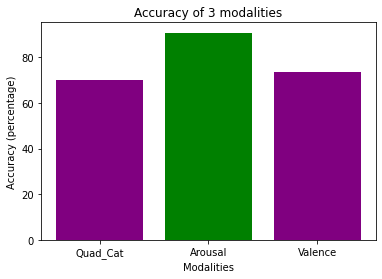

In [16]:
left = [1, 2, 3]
  
height = [all_quad_accuracy_mean, all_ar_accuracy_mean, all_va_accuracy_mean]
  
tick_label = ['Quad_Cat', 'Arousal', 'Valence']
  
plt.bar(left, height, tick_label = tick_label,
        width = 0.8, color = ['purple', 'green'])
  
plt.xlabel('Modalities')
plt.ylabel('Accuracy (percentage)')
plt.title('Accuracy of 3 modalities')
  
plt.show()

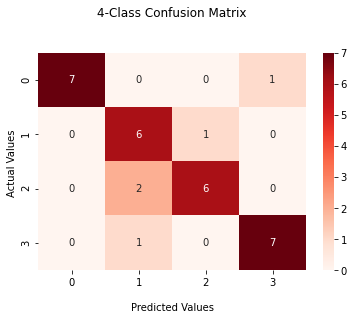

In [13]:
import seaborn as sns

#Confusion Matrix for 4-Class
ax = sns.heatmap(all_quad_cm, annot=True, cmap='Reds')

#ax = sns.heatmap(all_quad_cm/np.sum(all_quad_cm), annot=True, fmt='.1%', cmap='Reds')

ax.set_title('4-Class Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['0','1','2','3'])
ax.yaxis.set_ticklabels(['0','1','2','3'])

# Display the visualization of the Confusion Matrix.
plt.show()

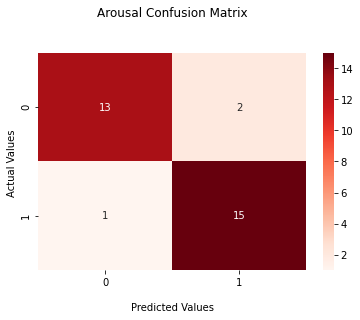

In [14]:
#Confusion Matrix for Arousal

ax = sns.heatmap(all_ar_cm, annot=True, cmap='Reds')

ax.set_title('Arousal Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

# Display the visualization of the Confusion Matrix.
plt.show()

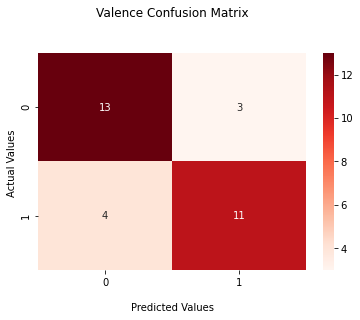

In [15]:
#Confusion Matrix for Valence

ax = sns.heatmap(all_va_cm, annot=True, cmap='Reds')

ax.set_title('Valence Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

# Display the visualization of the Confusion Matrix.
plt.show()